<a id=top-page></a>
# `pykitPIV` demo: Transform images

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>Table of contents:</strong></font>
<br>
<ol>
    <li><a href="#upload">Upload the saved datasets</a></li>
</ol>
<p></p>
</div>
<br>

***

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import torch
import cmcrameri.cm as cmc
from pykitPIV import Image
from pykitPIV import Postprocess, FlowField

***

## Post-process on-the-fly user-created dataset

In [2]:
figsize=(6,3)

In [3]:
image = Image(random_seed=100)

In [4]:
flowfield = FlowField(1,
                      size=(30,30),
                      size_buffer=0,
                      random_seed=100)

In [5]:
flowfield.generate_checkered_velocity_field(displacement=(0,2),
                                            m=8,
                                            n=8,
                                            rotation=None)

In [6]:
image.add_flowfield(flowfield)

Velocity field added to the image.


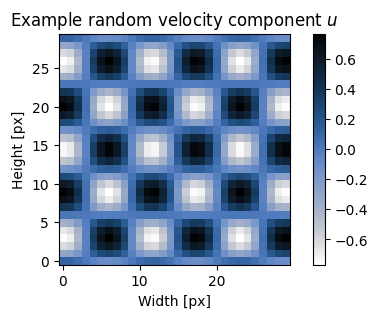

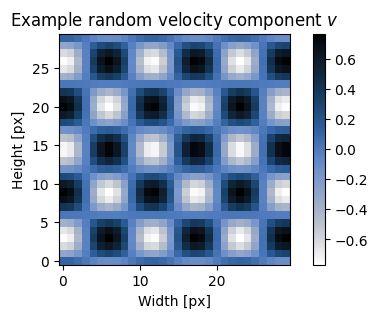

In [8]:
image.plot_field(0,
                  with_buffer=True,
                  xlabel='Width [px]',
                  ylabel='Height [px]',
                  title=('Example random velocity component $u$', 'Example random velocity component $v$'),
                  cmap=cmc.oslo_r,
                  figsize=figsize);

In [9]:
image_tensor = flowfield.velocity_field[0][0][None,:,:]
image_tensor.shape

(1, 30, 30)

In [10]:
postprocess = Postprocess(image_tensor)

In [11]:
log_transformed_images_tensor = postprocess.log_transform_images(addition=10)

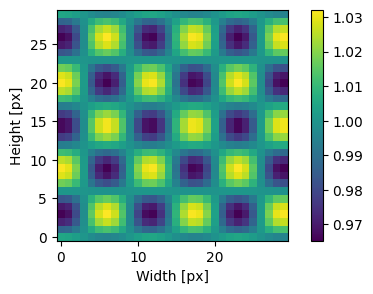

In [12]:
postprocess.plot(False,
                 0,
                 instance=2,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 cmap='viridis',
                 cbar=True,
                 figsize=figsize);

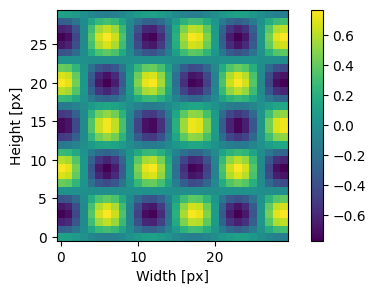

In [13]:
postprocess.plot(True,
                 0,
                 instance=2,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 cmap='viridis',
                 cbar=True,
                 figsize=figsize);

In [14]:
filters = np.ones((5,5))

In [15]:
filters[0,:] = 1
filters[1,:] = 0
filters[3,:] = 0
filters[4,:] = 1

In [16]:
filters

array([[1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.]])

In [17]:
from torch.nn import Conv2d
import torch.nn.functional as F

In [18]:
filtered_image_tensor = F.conv2d(torch.from_numpy(image_tensor), 
                                                   torch.from_numpy(filters[None,None,:,:]), 
                                                   padding='same')

In [19]:
Hin = 10

In [20]:
x = torch.rand(1,3,Hin,Hin)
conv = Conv2d(3, 1000, 1, padding=(1,1), stride=(1,1), dilation=(1,1))
output = conv(x)
output.shape

torch.Size([1, 1000, 12, 12])

In [22]:
conv.padding

(1, 1)

In [21]:
conv_grouped.dilation

NameError: name 'conv_grouped' is not defined

In [22]:
conv_grouped.kernel_size

NameError: name 'conv_grouped' is not defined

In [23]:
conv_grouped.stride

NameError: name 'conv_grouped' is not defined

In [24]:
Hout = int(np.floor((Hin - (2 * conv_grouped.padding[0]) - conv_grouped.dilation[0] * (conv_grouped.kernel_size[0] - 1) - 1) / (conv_grouped.stride[0]) + 1))
Hout

NameError: name 'conv_grouped' is not defined

In [25]:
conv_grouped.weight.shape

NameError: name 'conv_grouped' is not defined

In [26]:
conv_grouped.bias.shape

NameError: name 'conv_grouped' is not defined

In [27]:
from diff_conv2d import functional

ModuleNotFoundError: No module named 'diff_conv2d'

In [28]:
torch.set_default_dtype(torch.float64)
B_, Ci_, H_, W_ = 8, 4, 500, 300
n_ = 5
p_ = n_ // 2
Co_, groups_ = 1, 1
img_ = torch.rand(B_, Ci_, H_, W_)
kernel_ = torch.rand(Co_, Ci_ // groups_, n_, n_)
model = functional.DiffConv2d(kernel_size=n_)
res_s = model.conv2d(img_, kernel_, groups=groups_, optimized_for='speed')
res_m = model.conv2d(img_, kernel_, groups=groups_, optimized_for='memory')
print(res_s.shape)
print((res_s - res_m).abs().max())

NameError: name 'functional' is not defined

In [ ]:
plt.imshow(filtered_image_tensor[0,:,:])
plt.colorbar()

In [ ]:
plt.imshow(image_tensor[0,:,:])
plt.colorbar()

In [ ]:
plt.imshow(input_tensor[0,:,:]/torch.max(input_tensor[0,:,:]) - filtered_image_tensor[0,:,:]/torch.max(filtered_image_tensor[0,:,:]), 
           cmap='coolwarm')

plt.colorbar();

In [ ]:
from diff_conv2d import functional
from diff_conv2d import layers
from diff_conv2d import maths

In [ ]:
from diff_conv2d.functional import DiffConv2d

diff = DiffConv2d(kernel_size=5)  # kernel_size can be 3, 5, or 7
output = diff.conv2d(torch.from_numpy(image_tensor[None,:,:,:]).float(), torch.from_numpy(filters[None,None,:,:]).float())

In [ ]:
output.shape

In [ ]:
plt.imshow(output[0,0,:,:])
plt.colorbar()

In [ ]:
plt.imshow(input_tensor[0,:,:]/torch.max(input_tensor[0,:,:]) - output[0,0,:,:]/torch.max(output[0,0,:,:]), 
           cmap='coolwarm', vmin=-0.3, vmax=0.3)

plt.colorbar();

In [ ]:
m = torch.nn.Conv2d(1, 1, 3, stride=1, padding='same', padding_mode='zeros', bias=False)
output = m(input_tensor.float())

In [ ]:
plt.imshow(filtered_image_tensor[0,0,:,:]/torch.max(filtered_image_tensor[0,0,:,:]))
plt.colorbar()

In [ ]:
plt.imshow(input_tensor[0,0,:,:]/torch.max(input_tensor[0,0,:,:]))
plt.colorbar()

<a id=upload></a>
***

## Post-process saved dataset

[Go to the top](#top-page)

The standalone import of previously saved PIV image pairs and the associated targets can be performed following this minimal example:

In [ ]:
image = Image()

In [ ]:
images_tensor_dic = image.upload_from_h5(filename='pykitPIV-tutorial-PIV-pairs.h5')
images_tensor = images_tensor_dic['I']
images_tensor = images_tensor[:,:,:,:]
images_tensor.shape

In [ ]:
postprocess = Postprocess(images_tensor)

In [ ]:
postprocess.image_pair

In [ ]:
log_transformed_images_tensor = postprocess.log_transform_images(addition=10000)

In [ ]:
log_transformed_images_tensor.shape

In [ ]:
postprocess.processed_image_tensor.shape

In [ ]:
postprocess.plot(1,
                 instance=1,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 cmap='Greys_r',
                 figsize=(10,3));

In [ ]:
postprocess.plot(1,
                 instance=2,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 cmap='Greys_r',
                 figsize=(10,3));

In [ ]:
def chebyshev_polynomial(h, w, order):

    (grid_w, grid_h) = np.meshgrid(w, h)

    Un_h = np.zeros((len(h), 1))
    Un_w = np.zeros((1, len(w)))
    sin_product = np.sin(order * (grid_w + grid_h))

    for i in range(0,len(h)):

        product = 1
        for k in range(0, order):
            product *= (h[i] - np.cos((k * np.pi)) / (order + 1))

        Un_h[i,0] = 2**order * product

    for i in range(0,len(w)):

        product = 1
        for k in range(0, order):
            product *= (w[i] - np.cos((k * np.pi)) / (order + 1))
            
        Un_w[0,i] = 2**order * product

    return np.dot(Un_h, Un_w) #* sin_product

In [ ]:
poly = chebyshev_polynomial(h, w, order=5)

In [ ]:
plt.imshow(poly, origin='lower')

In [ ]:
import numpy as np
import torch
from scipy.special import chebyu

def f_chebyu(n):
    """ Chebyshev """
    length = 500
    h_crd = np.linspace(.3, .8, length)
    w_crd = np.linspace(.3, .8, length)
    h, w = np.meshgrid(h_crd, w_crd, indexing='ij')
    un = chebyu(n)
    return un(h) * un(w) * np.sin((h + w) * n)

In [ ]:
poly = f_chebyu(20)

In [ ]:
plt.imshow(poly, origin='lower', cmap='jet');

***

© K. Zdybał, C. Mucignat, I. Lunati (2024)